# Introduction to Regression with Neural networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: pridcting a nemerical variable based on some other cmbination of varialles, even shorter... predicting a number

In [164]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


## Creating data to view and fit

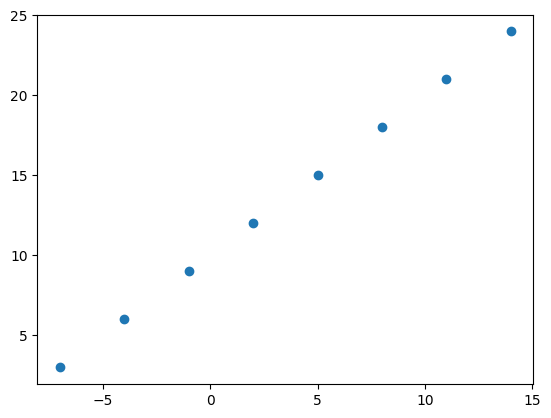

In [165]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y  = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [166]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [167]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [168]:
input_shape = X.shape
output_shape = y.shape

In [169]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [170]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function, the optimizer and evaluation matrix
3. Fitting the model - letting model try and find patterns between X & y (features and Label)

In [171]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 171ms/step - loss: 8.7744 - mae: 8.7744
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 8.6419 - mae: 8.6419
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 8.5094 - mae: 8.5094
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 8.3769 - mae: 8.3769
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 8.2444 - mae: 8.2444


In [172]:
model.predict([17.0])

1/1 [==============================] - 0s 26ms/step


array([[25.977968]], dtype=float32)

## Improving the model



In [173]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 14.2238 - mae: 14.2238
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.1281 - mae: 14.1281
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.0323 - mae: 14.0323
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.9366 - mae: 13.9366
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8408 - mae: 13.8408
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.7451 - mae: 13.7451
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.6492 - mae: 13.6492
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5534 - mae: 13.5534
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4575 - mae: 13.4575
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 13.3615 - mae: 13.3615
Epoch 11/100
1/1 [==============================] - 0s 2m

In [174]:
model.predict([17])

1/1 [==============================] - 0s 31ms/step


array([[30.316431]], dtype=float32)

In [175]:
# Make bigger dataset -

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [176]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

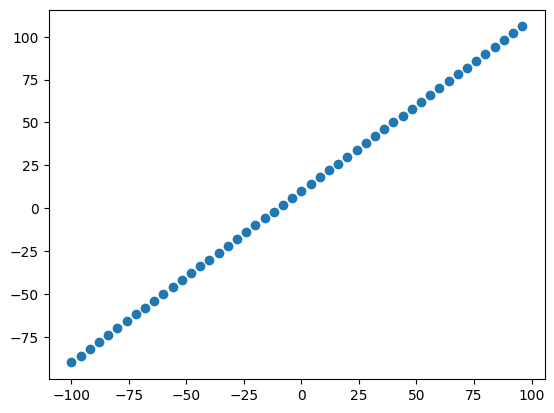

In [177]:
plt.scatter(X, y)

### The 3 sets...



In [178]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

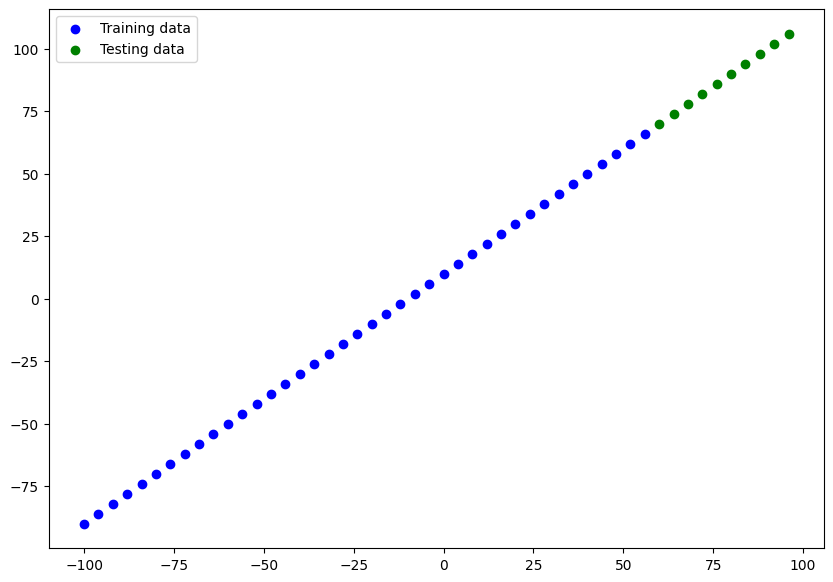

In [179]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="Training data", c="b")
plt.scatter(X_test, y_test, label="Testing data", c="g")
plt.legend();

In [180]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), name="input_layer"),
    tf.keras.layers.Dense(100, input_shape=(1,), name="hidden_layer1"),
    tf.keras.layers.Dense(100, input_shape=(1,), name="hidden_layer2"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_name")

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 45.5142 - mae: 45.5142
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 33.6898 - mae: 33.6898
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 12.2478 - mae: 12.2478
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 23.6698 - mae: 23.6698
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 17.5782 - mae: 17.5782
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 8.0664 - mae: 8.0664
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.5954 - mae: 11.5954
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 8.4296 - mae: 8.4296
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 8.6726 - mae: 8.6726
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 11.4939 - mae: 11.4939
Epoch 11/100
2/2 [==============================] - 0s 2ms/step -

In [181]:
model.summary()

Model: "model_name"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer1 (Dense)       (None, 100)               200       
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10403 (40.64 KB)
Trainable params: 10403 (40.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
from tensorflow.keras.utils import plot_model

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [183]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing model's predictions



In [184]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 32ms/step


array([[ 66.27975 ],
       [ 70.056404],
       [ 73.833046],
       [ 77.60969 ],
       [ 81.38634 ],
       [ 85.162994],
       [ 88.93964 ],
       [ 92.716286],
       [ 96.49294 ],
       [100.269585]], dtype=float32)

In [185]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [186]:
# Plotting function:
def plotting_function(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
  """
  Plots training data, test data and predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, c="b")
  plt.scatter(X_test, y_test, c="g")
  plt.scatter(X_test, predictions, c="r")
  plt.legend

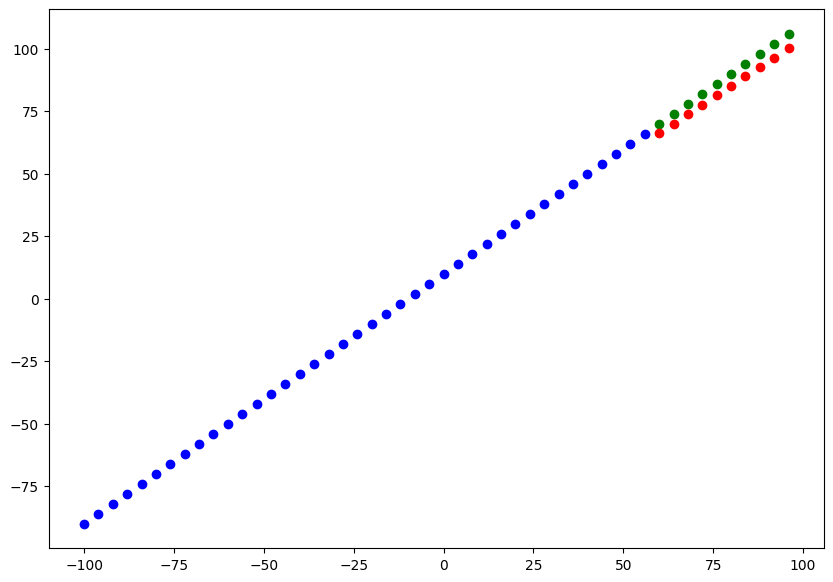

In [187]:
plotting_function(train_data=X_train,
                  train_labels=y_train,
                  test_data=X_test,
                  test_labels=y_test,
                  predictions=y_pred)

In [188]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 54ms/step - loss: 4.7253 - mae: 4.7253


[4.7253289222717285, 4.7253289222717285]

In [189]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.725333>

In [190]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=22.740335>

In [191]:
def mae(y_pred, y_true = y_test):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))
def mse(y_pred, y_true = y_test):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running Experiments to improve model

#### Model: 1 layer trained for 100 epochs

In [192]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss="mae",
                     optimizer="sgd",
                     metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100


2/2 [==============================] - 0s 2ms/step - loss: 21.0521 - mae: 21.0521
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 9.3677 - mae: 9.3677
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6377 - mae: 7.6377
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.7471 - mae: 9.7471
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0444 - mae: 11.0444
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2015 - mae: 10.2015
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2150 - mae: 9.2150
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7641 - mae: 11.7641
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.6872 - mae: 13.6872
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 11.7603 -

1/1 [==============================] - 0s 19ms/step


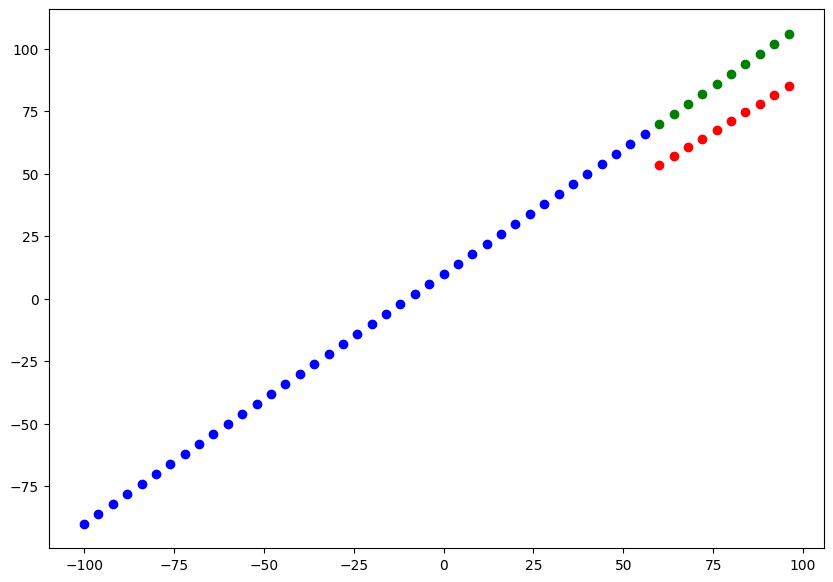

In [193]:
# Make and plot predictions
y_pred_1 = model_1.predict(X_test)
plotting_function(predictions=y_pred_1)

In [194]:
mae_1 = mae(y_pred_1)
mse_1 = mse(y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.717316>,
 <tf.Tensor: shape=(), dtype=float32, numpy=352.51556>)

#### Model 2 - 2 layers, 100 epochs

In [195]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae", "mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 30.2833 - mae: 30.2833 - mse: 1352.0654
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 26.1781 - mae: 26.1781 - mse: 889.2505
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 30.4611 - mae: 30.4611 - mse: 1411.8274
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 13.4015 - mae: 13.4015 - mse: 248.8863
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 18.0312 - mae: 18.0312 - mse: 439.9840
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 8.0152 - mae: 8.0152 - mse: 90.6381
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.7993 - mae: 12.7993 - mse: 222.8720
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1208 - mae: 11.1208 - mse: 156.2759
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.5802 - mae: 40.5802 - mse: 2596.0884
Epoch 10/1

1/1 [==============================] - 0s 22ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=13.35112>,
 <tf.Tensor: shape=(), dtype=float32, numpy=188.34348>)

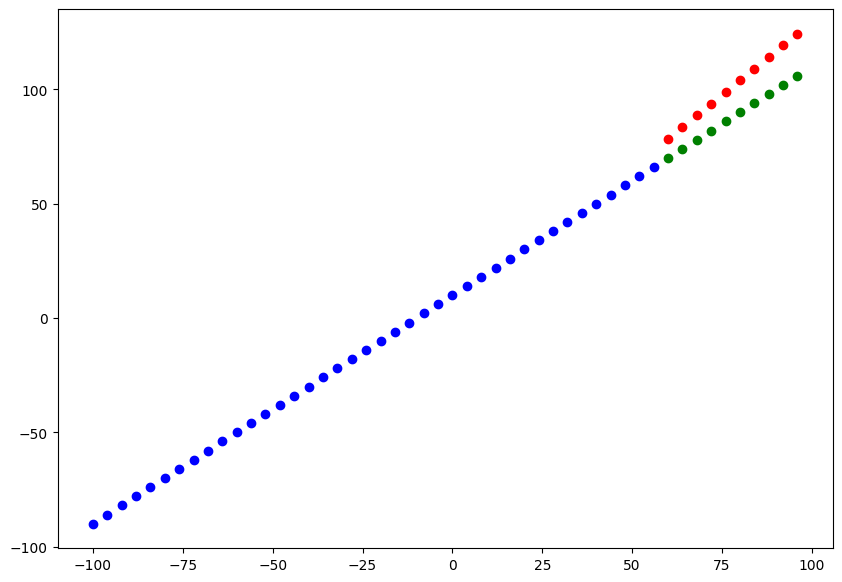

In [196]:
# Make and plot predictions
y_pred_2 = model_2.predict(X_test)
plotting_function(predictions=y_pred_2)
mae_2 = mae(y_pred_2)
mse_2 = mse(y_pred_2)
mae_2, mse_2

#### Model 2 - 2 layers, 100 epochs

In [197]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 2ms/step - loss: 46.7826 - mae: 46.7826 - mse: 2990.4434
Epoch 2/250
2/2 [==============================] - 0s 2ms/step - loss: 44.6078 - mae: 44.6078 - mse: 2717.3728
Epoch 3/250
2/2 [==============================] - 0s 3ms/step - loss: 42.5197 - mae: 42.5197 - mse: 2462.3291
Epoch 4/250
2/2 [==============================] - 0s 2ms/step - loss: 40.3818 - mae: 40.3818 - mse: 2217.7930
Epoch 5/250
2/2 [==============================] - 0s 2ms/step - loss: 38.2966 - mae: 38.2966 - mse: 1994.9949
Epoch 6/250
2/2 [==============================] - 0s 2ms/step - loss: 36.1931 - mae: 36.1931 - mse: 1779.3254
Epoch 7/250
2/2 [==============================] - 0s 2ms/step - loss: 34.0705 - mae: 34.0705 - mse: 1572.4705
Epoch 8/250
2/2 [==============================] - 0s 2ms/step - loss: 31.9070 - mae: 31.9070 - mse: 1367.9408
Epoch 9/250
2/2 [==============================] - 0s 2ms/step - loss: 29.8859 - mae: 29.8859 - mse: 1201.5992
E

1/1 [==============================] - 0s 26ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=0.23763886>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.056979537>)

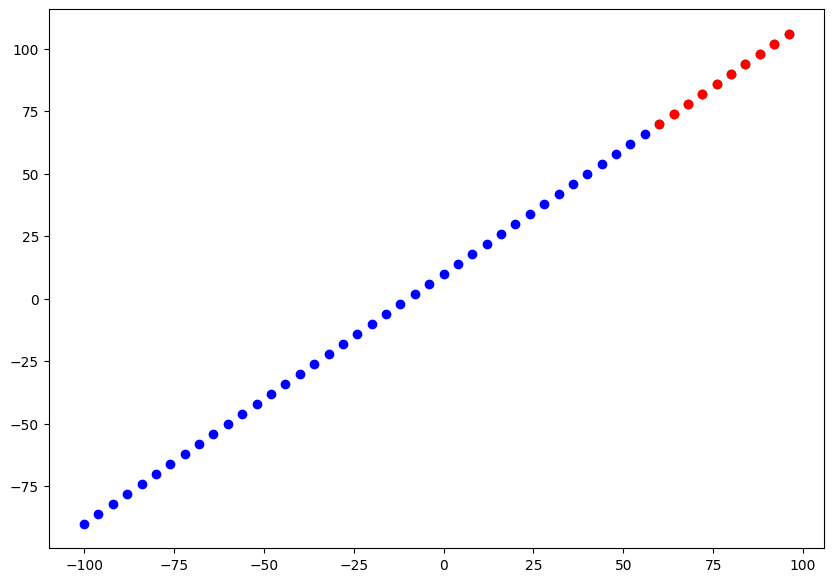

In [198]:
# Make and plot predictions
y_pred_3 = model_3.predict(X_test)
plotting_function(predictions=y_pred_3)
mae_3 = mae(y_pred_3)
mse_3 = mse(y_pred_3)
mae_3, mse_3

## Comparing results of our experiments

In [199]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results=pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.717316,352.515564
1,model_2,13.351120,188.343475
2,model_3,0.237639,0.056980


In [200]:
model_2.save("model.keras")

### Download a file from colab

In [201]:
# from google.colab import files
# files.download("model")

# A larger example

In [202]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [204]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [205]:
# Separate X and y
X = insurance_one_hot.drop("charges", axis=1).to_numpy(dtype=np.float32)
y = insurance_one_hot["charges"].to_numpy(dtype=np.float32)

In [206]:
X

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [207]:
y

array([16884.924 ,  1725.5522,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.36  ], dtype=float32)

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [209]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss="mae",
                        optimizer="sgd",
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


34/34 [==============================] - 0s 606us/step - loss: 8564.7764 - mae: 8564.7764
Epoch 2/100
34/34 [==============================] - 0s 539us/step - loss: 7667.3652 - mae: 7667.3652
Epoch 3/100
34/34 [==============================] - 0s 583us/step - loss: 7514.4448 - mae: 7514.4448
Epoch 4/100
34/34 [==============================] - 0s 513us/step - loss: 7757.3950 - mae: 7757.3950
Epoch 5/100
34/34 [==============================] - 0s 525us/step - loss: 7410.8579 - mae: 7410.8579
Epoch 6/100
34/34 [==============================] - 0s 513us/step - loss: 7544.1787 - mae: 7544.1787
Epoch 7/100
34/34 [==============================] - 0s 497us/step - loss: 7791.8931 - mae: 7791.8931
Epoch 8/100
34/34 [==============================] - 0s 500us/step - loss: 7451.3145 - mae: 7451.3145
Epoch 9/100
34/34 [==============================] - 0s 491us/step - loss: 7666.8296 - mae: 7666.8296
Epoch 10/100
34/34 [==============================] - 0s 494us/step - loss: 7607.2554 - mae: 7

In [210]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 687us/step - loss: 6740.8325 - mae: 6740.8325


[6740.83251953125, 6740.83251953125]

In [211]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae", "mse"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 793us/step - loss: 13176.4570 - mae: 13176.4570 - mse: 319398080.0000
Epoch 2/100
34/34 [==============================] - 0s 675us/step - loss: 13049.3965 - mae: 13049.3965 - mse: 315773344.0000
Epoch 3/100
34/34 [==============================] - 0s 632us/step - loss: 12775.1719 - mae: 12775.1719 - mse: 308419840.0000
Epoch 4/100
34/34 [==============================] - 0s 615us/step - loss: 12209.7373 - mae: 12209.7373 - mse: 293448992.0000
Epoch 5/100
34/34 [==============================] - 0s 821us/step - loss: 11212.1318 - mae: 11212.1318 - mse: 267690336.0000
Epoch 6/100
34/34 [==============================] - 0s 638us/step - loss: 9816.5684 - mae: 9816.5684 - mse: 233426496.0000
Epoch 7/100
34/34 [==============================] - 0s 641us/step - loss: 8407.1191 - mae: 8407.1191 - mse: 196184608.0000
Epoch 8/100
34/34 [==============================] - 0s 609us/step - loss: 7642.0352 - mae: 7642.0352 - mse: 168049872.000

In [212]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 736us/step - loss: 5140.4360 - mae: 5140.4360 - mse: 109271224.0000


[5140.43603515625, 5140.43603515625, 109271224.0]

In [213]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 680us/step - loss: 13139.8379 - mae: 13139.8379
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12960.1055 - mae: 12960.1055
Epoch 3/200
34/34 [==============================] - 0s 658us/step - loss: 12594.9160 - mae: 12594.9160
Epoch 4/200
34/34 [==============================] - 0s 584us/step - loss: 11897.8115 - mae: 11897.8115
Epoch 5/200
34/34 [==============================] - 0s 586us/step - loss: 10751.4795 - mae: 10751.4795
Epoch 6/200
34/34 [==============================] - 0s 589us/step - loss: 9298.5908 - mae: 9298.5908
Epoch 7/200
34/34 [==============================] - 0s 673us/step - loss: 8035.2671 - mae: 8035.2671
Epoch 8/200
34/34 [==============================] - 0s 601us/step - loss: 7532.1221 - mae: 7532.1221
Epoch 9/200
34/34 [==============================] - 0s 590us/step - loss: 7433.3291 - mae: 7433.3291
Epoch 10/200
34/34 [==============================] - 0s 581us/step - loss

In [214]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 654us/step - loss: 3576.3752 - mae: 3576.3752


[3576.375244140625, 3576.375244140625]

Text(0.5, 0, 'epochs')

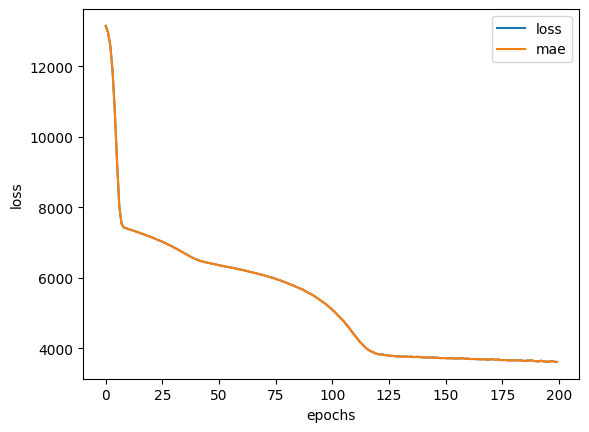

In [215]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [216]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model_4.fit(X_train, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 0s 720us/step - loss: 13168.1992 - mae: 13168.1992
Epoch 2/150
34/34 [==============================] - 0s 626us/step - loss: 12978.3428 - mae: 12978.3428
Epoch 3/150
34/34 [==============================] - 0s 631us/step - loss: 12577.0215 - mae: 12577.0215
Epoch 4/150
34/34 [==============================] - 0s 580us/step - loss: 11804.7354 - mae: 11804.7354
Epoch 5/150
34/34 [==============================] - 0s 573us/step - loss: 10574.8350 - mae: 10574.8350
Epoch 6/150
34/34 [==============================] - 0s 577us/step - loss: 9089.7920 - mae: 9089.7920
Epoch 7/150
34/34 [==============================] - 0s 578us/step - loss: 7922.4121 - mae: 7922.4121
Epoch 8/150
34/34 [==============================] - 0s 577us/step - loss: 7514.8115 - mae: 7514.8115
Epoch 9/150
34/34 [==============================] - 0s 581us/step - loss: 7438.4258 - mae: 7438.4258
Epoch 10/150
34/34 [==============================] - 0s 577us/step - lo

In [217]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 694us/step - loss: 3638.8911 - mae: 3638.8911


[3638.89111328125, 3638.89111328125]

Text(0.5, 0, 'epochs')

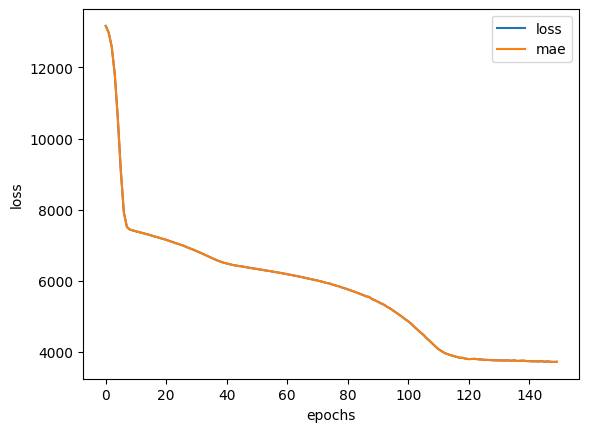

In [218]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing Data (normalization and standardization)

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [220]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)

In [221]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [222]:
tf.random.set_seed(42)

insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history_5 = insurance_model_5.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 714us/step - loss: 13344.0449 - mae: 13344.0449
Epoch 2/100
34/34 [==============================] - 0s 653us/step - loss: 13335.4375 - mae: 13335.4375
Epoch 3/100
34/34 [==============================] - 0s 608us/step - loss: 13313.6035 - mae: 13313.6035
Epoch 4/100
34/34 [==============================] - 0s 575us/step - loss: 13267.4248 - mae: 13267.4248
Epoch 5/100
34/34 [==============================] - 0s 590us/step - loss: 13185.5449 - mae: 13185.5449
Epoch 6/100
34/34 [==============================] - 0s 580us/step - loss: 13056.8535 - mae: 13056.8535
Epoch 7/100
34/34 [==============================] - 0s 576us/step - loss: 12871.0879 - mae: 12871.0879
Epoch 8/100
34/34 [==============================] - 0s 581us/step - loss: 12618.3389 - mae: 12618.3389
Epoch 9/100
34/34 [==============================] - 0s 580us/step - loss: 12288.5410 - mae: 12288.5410
Epoch 10/100
34/34 [==============================] - 0s 585us/s

In [223]:
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 693us/step - loss: 3435.8376 - mae: 3435.8376


[3435.837646484375, 3435.837646484375]

Text(0.5, 1.0, 'Insurance Model 5')

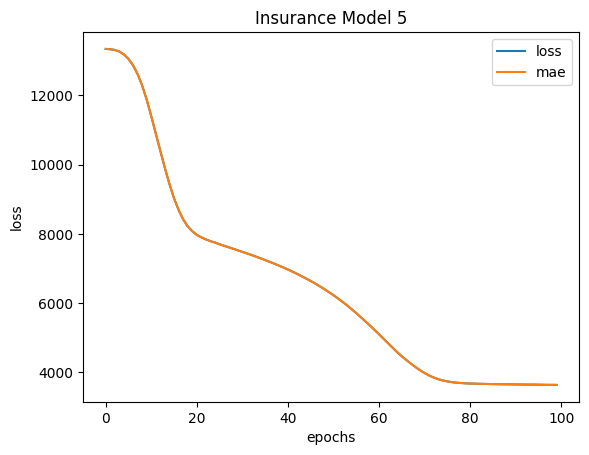

In [224]:
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Insurance Model 5")

### Exercise 1: Trying out Boston Housing Dataset

In [230]:
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [231]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import MinMaxScaler

# ct = make_column_transformer(
#   (MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10 ,11 ,12]),
# )

# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)


# pd.DataFrame(X_train)

In [243]:
tf.random.set_seed(42)

boston_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

boston_history = boston_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 961us/step - loss: 49.6180 - mae: 49.6180
Epoch 2/100
13/13 [==============================] - 0s 846us/step - loss: 19.1970 - mae: 19.1970
Epoch 3/100
13/13 [==============================] - 0s 800us/step - loss: 12.0210 - mae: 12.0210
Epoch 4/100
13/13 [==============================] - 0s 836us/step - loss: 8.8589 - mae: 8.8589
Epoch 5/100
13/13 [==============================] - 0s 841us/step - loss: 8.0573 - mae: 8.0573
Epoch 6/100
13/13 [==============================] - 0s 894us/step - loss: 7.0231 - mae: 7.0231
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 8.1173 - mae: 8.1173
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 7.1638 - mae: 7.1638
Epoch 9/100
13/13 [==============================] - 0s 712us/step - loss: 5.9090 - mae: 5.9090
Epoch 10/100
13/13 [==============================] - 0s 720us/step - loss: 6.3384 - mae: 6.3384
Epoch 11/100
13/13 [=================

In [244]:
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 6.0132 - mae: 6.0132


[6.013193607330322, 6.013193607330322]

<Axes: >

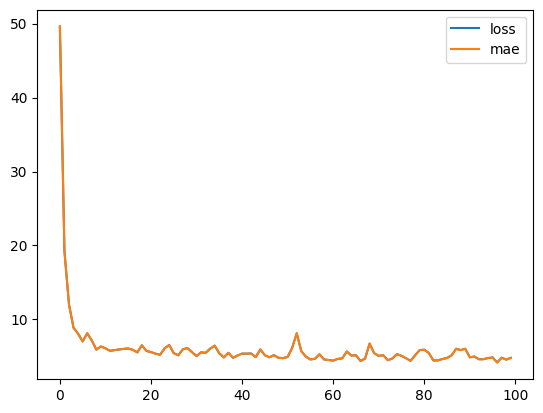

In [245]:
pd.DataFrame(boston_history.history).plot()